In [ ]:
print("Nguyễn Nguyễn Nhật - 6351071052")

Nguyễn Nguyễn Nhật - 6351071052


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_folder_dataset = "/content/drive/MyDrive/Colab Notebooks/LAB2/Dataset"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import BernoulliNB # Dùng BernoulliNB vì X sẽ là one-hot (0/1)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Tải lại dữ liệu
data = pd.read_csv(f"{path_to_folder_dataset}/mushrooms.csv")

# In 5 dòng đầu để kiểm tra
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# 1. Thay thế '?' bằng NaN (Not a Number) để pandas nhận diện
data.replace('?', np.nan, inplace=True)

# 2. Kiểm tra xem cột nào có giá trị thiếu
print("Số lượng giá trị thiếu (NaN) trong mỗi cột:")
print(data.isnull().sum())

# 3. Điền giá trị thiếu
# Cách đơn giản nhất là điền bằng giá trị xuất hiện nhiều nhất (mode)
# của cột 'stalk-root'
data['stalk-root'] = data['stalk-root'].fillna(data['stalk-root'].mode()[0])

# 4. Kiểm tra lại, sẽ thấy không còn giá trị thiếu
print("\nSố giá trị thiếu sau khi xử lý:", data.isnull().sum().sum())

Số lượng giá trị thiếu (NaN) trong mỗi cột:
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Số giá trị thiếu sau khi xử lý: 0


In [ ]:
# Yêu cầu 4: Tách cột quyết định (target) và các cột thuộc tính (features)
# 'class' là cột quyết định (y), phần còn lại là features (X)

X_categorical = data.drop('class', axis=1) # Dữ liệu X ở dạng chữ
y_categorical = data['class']           # Dữ liệu y ở dạng chữ ('e', 'p')

print("Kích thước X (dạng chữ):", X_categorical.shape)
print("Kích thước y (dạng chữ):", y_categorical.shape)

Kích thước X (dạng chữ): (8124, 22)
Kích thước y (dạng chữ): (8124,)


In [ ]:
# Yêu cầu 5: Chuyển đổi

# 1. Mã hóa 'y' (class) thành số (e=0, p=1)
le = LabelEncoder()
y = le.fit_transform(y_categorical)
print("Các lớp của y:", le.classes_) # Sẽ thấy ['e' 'p']

# 2. Mã hóa One-Hot cho 'X'
# pd.get_dummies là cách nhanh nhất để thực hiện one-hot encoding
X = pd.get_dummies(X_categorical)

print("\nKích thước của X sau khi One-Hot Encoding:", X.shape)
print("5 dòng đầu của X (đã one-hot):")
X.head()

Các lớp của y: ['e' 'p']

Kích thước của X sau khi One-Hot Encoding: (8124, 116)
5 dòng đầu của X (đã one-hot):


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Yêu cầu 6: Tách dữ liệu thành tập huấn luyện và kiểm thử
# Dùng tỷ lệ 70% huấn luyện, 30% kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Kích thước tập huấn luyện (X_train):", X_train.shape)
print("Kích thước tập kiểm thử (X_test):", X_test.shape)
print("Kích thước nhãn huấn luyện (y_train):", y_train.shape)
print("Kích thước nhãn kiểm thử (y_test):", y_test.shape)

Kích thước tập huấn luyện (X_train): (5686, 116)
Kích thước tập kiểm thử (X_test): (2438, 116)
Kích thước nhãn huấn luyện (y_train): (5686,)
Kích thước nhãn kiểm thử (y_test): (2438,)


In [ ]:
# Yêu cầu 7: Xây dựng cây ID3 (dùng 'entropy' làm tiêu chuẩn)
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện mô hình
id3_tree.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_id3 = id3_tree.predict(X_test)

# Đánh giá mô hình
print("--- Kết quả mô hình ID3 (Entropy) ---")
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred_id3))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred_id3))

# In báo cáo phân loại (cho thấy precision, recall, f1-score)
# target_names=le.classes_ sẽ dùng tên nhãn ['e', 'p']
print("\nBáo cáo phân loại (Classification Report):\n",
      classification_report(y_test, y_pred_id3, target_names=le.classes_))

--- Kết quả mô hình ID3 (Entropy) ---
Độ chính xác (Accuracy): 1.0

Ma trận nhầm lẫn (Confusion Matrix):
 [[1257    0]
 [   0 1181]]

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



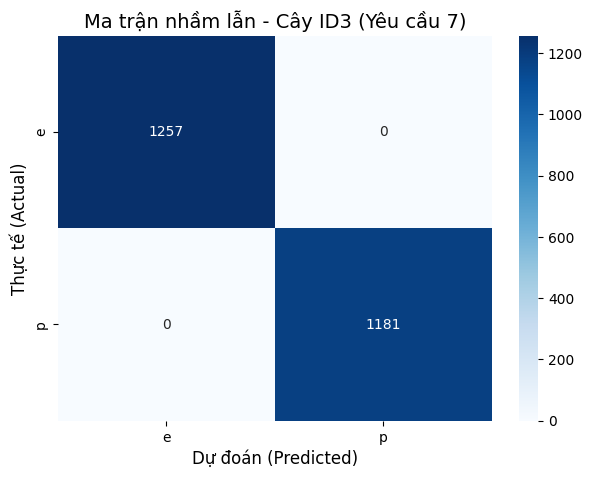

In [ ]:
# Import thêm thư viện nếu block này chạy riêng
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Tính toán lại ma trận nhầm lẫn từ kết quả của Block 6
# (Giả định y_test và y_pred_id3 đã tồn tại)
cm_id3 = confusion_matrix(y_test, y_pred_id3)

# 2. Lấy tên các lớp (ví dụ: ['e', 'p'])
# (Giả định biến 'le' từ Block 5 vẫn còn)
class_names = le.classes_

# 3. Vẽ Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_id3,
            annot=True,     # Hiển thị số lượng
            fmt='d',        # Định dạng số nguyên
            cmap='Blues',   # Màu sắc
            xticklabels=class_names, # Nhãn cột x
            yticklabels=class_names) # Nhãn cột y

plt.title('Ma trận nhầm lẫn - Cây ID3 (Yêu cầu 7)', fontsize=14)
plt.xlabel('Dự đoán (Predicted)', fontsize=12)
plt.ylabel('Thực tế (Actual)', fontsize=12)
plt.show() # Hiển thị biểu đồ

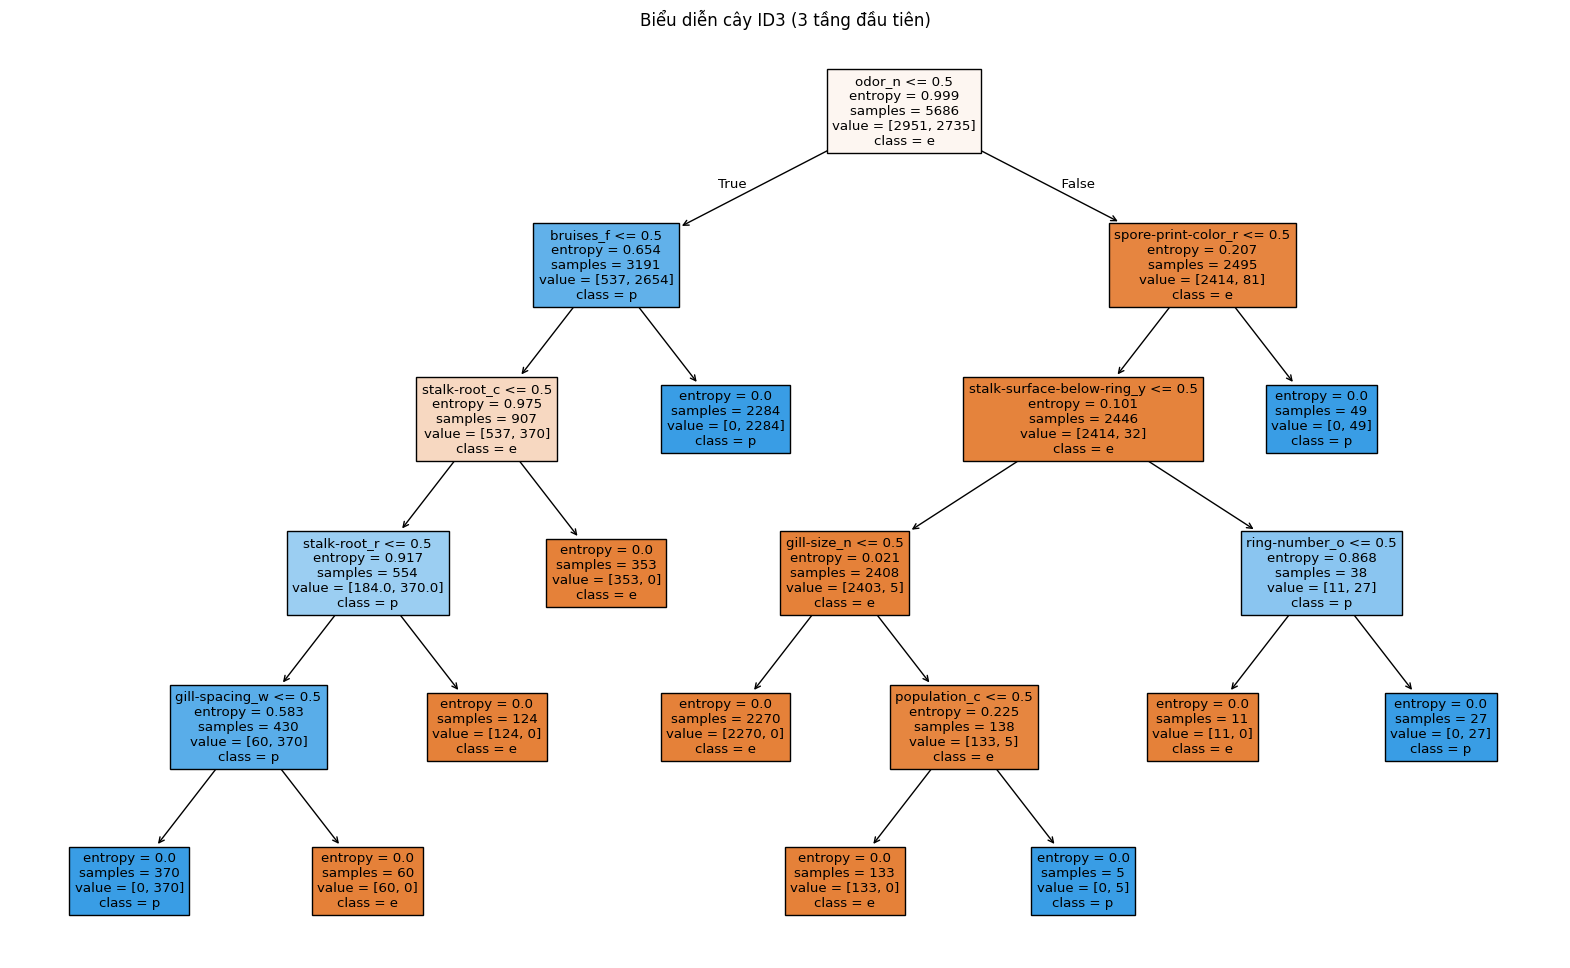

In [ ]:
# Yêu cầu 7 (Tiếp theo): Biểu diễn cây ID3
plt.figure(figsize=(20, 12))
plot_tree(id3_tree,
          feature_names=X.columns.to_list(),
          class_names=le.classes_,
          filled=True) # Chỉ vẽ 3 tầng đầu tiên cho dễ nhìn
plt.title("Biểu diễn cây ID3 (3 tầng đầu tiên)")
plt.show()

In [ ]:
# Yêu cầu 8: Xây dựng cây CART (dùng 'gini' làm tiêu chuẩn)
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Huấn luyện mô hình
cart_tree.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_cart = cart_tree.predict(X_test)

# Đánh giá mô hình
print("--- Kết quả mô hình CART (Gini) ---")
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred_cart))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred_cart))
print("\nBáo cáo phân loại (Classification Report):\n",
      classification_report(y_test, y_pred_cart, target_names=le.classes_))

--- Kết quả mô hình CART (Gini) ---
Độ chính xác (Accuracy): 1.0

Ma trận nhầm lẫn (Confusion Matrix):
 [[1257    0]
 [   0 1181]]

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
# Yêu cầu 9: Xây dựng mô hình Naïve Bayes (Bernoulli)
nb_model = BernoulliNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

# Dự đoán
y_pred_nb = nb_model.predict(X_test)

# Đánh giá
print("--- Kết quả mô hình Naïve Bayes (Bernoulli) ---")
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred_nb))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred_nb))
print("\nBáo cáo phân loại (Classification Report):\n",
      classification_report(y_test, y_pred_nb, target_names=le.classes_))

--- Kết quả mô hình Naïve Bayes (Bernoulli) ---
Độ chính xác (Accuracy): 0.9360131255127153

Ma trận nhầm lẫn (Confusion Matrix):
 [[1243   14]
 [ 142 1039]]

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

           e       0.90      0.99      0.94      1257
           p       0.99      0.88      0.93      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.93      0.94      2438
weighted avg       0.94      0.94      0.94      2438



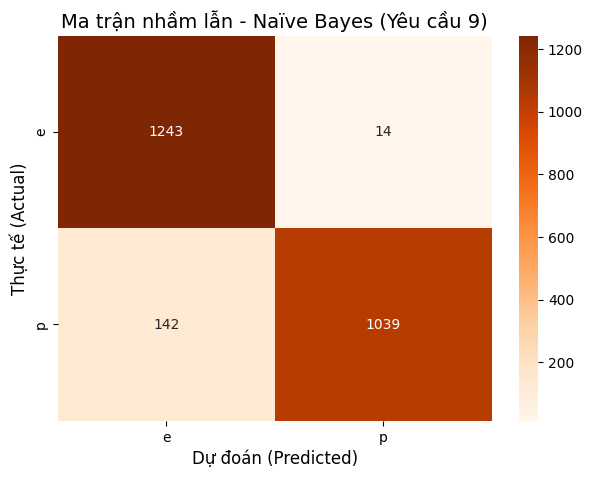

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

# 2. Lấy tên các lớp (ví dụ: ['e', 'p'])
# (Giả định biến 'le' từ Block 5 vẫn còn)
class_names = le.classes_

# 3. Vẽ Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_nb,
            annot=True,     # Hiển thị số lượng
            fmt='d',        # Định dạng số nguyên
            cmap='Oranges', # Màu sắc
            xticklabels=class_names, # Nhãn cột x
            yticklabels=class_names) # Nhãn cột y

plt.title('Ma trận nhầm lẫn - Naïve Bayes (Yêu cầu 9)', fontsize=14)
plt.xlabel('Dự đoán (Predicted)', fontsize=12)
plt.ylabel('Thực tế (Actual)', fontsize=12)
plt.show() # Hiển thị biểu đồ

In [ ]:
Cả hai mô hình Cây Quyết định (ID3 và CART) đều đạt độ chính xác tuyệt đối 100% trên tập kiểm thử. Điều này cho thấy bộ dữ liệu này có các quy tắc phân loại rất rõ ràng.

Mô hình Naïve Bayes (Bernoulli) cũng cho kết quả rất tốt (khoảng 93.6%), nhưng thấp hơn Cây Quyết định.

SyntaxError: invalid syntax (ipython-input-3829745512.py, line 1)